<h1 align="center"><b>CS114.L21 - MÁY HỌC - MACHINE LEARNING</b></h1>



1.   **Thành viên**


>>*   Hà Văn Thanh -19522224
>>*   Hoàng Quân -19522077

2.   **Tham khảo**

  >* Ví dụ mẫu: https://www.topcoder.com/thrive/articles/web-crawler-in-python?fbclid=IwAR038sIdu8Ndehk8BQRb0pD4MN0Ng6ycmLj3jfFKaCg9Gg1PP6FHM1Z_pmM
  >* Thư viện requests: https://pypi.org/project/requests/
  >* Thư viện Bs4: https://pypi.org/project/beautifulsoup4/
  >* ghi file csv:https://stackabuse.com/reading-and-writing-csv-files-in-python-with-pandas
3. **Mô tả** 
  
>>3.1   **Các website**



>>>*   Trang châm biếm:
          -chaser.com.au
          -huzlers.com
          -thebeaverton.com
          -thepoke.co.uk
>>>*   Trang chính thống:
          -nbcnews.com
          -nypost.com
          -thedailybeast.com

>>3.2  **Tổ chức dataset**


>>>*   **is_sarcastic**: 1 if the record is sarcastic otherwise 0
>>>*   **headline**: the headline of the news article
>>>*   **article_link**: link to the original news article. Useful for collecting supplementary data




4.   **Thử nghiệm**
# Website: https://chaser.com.au/



# **Code**

## **Thêm thư viện**

In [34]:
import requests
import lxml
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import csv


### **Format Dataset**

In [35]:
is_sarcastic=[] # 0 or 1
headline=[] #headline
article_link=[]  #url

## **Hàm requests tới website**

### Mô phỏng thông tin tiêu đề của trình duyệt để tránh bị chặn khi gửi yêu cầu tới trang web nhiều lần.

In [36]:
def requests_to_website(url):
  headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36 QIHU 360SE'
  }
  return  requests.get(url, headers = headers)


### **Hàm phân tích cú pháp trang**


In [37]:
def parser_website(url):
  r=requests_to_website(url)
  #tạo một đối tượng BeautifulSoup và chỉ định trình phân tích cú pháp là lxml
  return BeautifulSoup(r.content,'lxml')

### **Hàm lấy các thẻ**
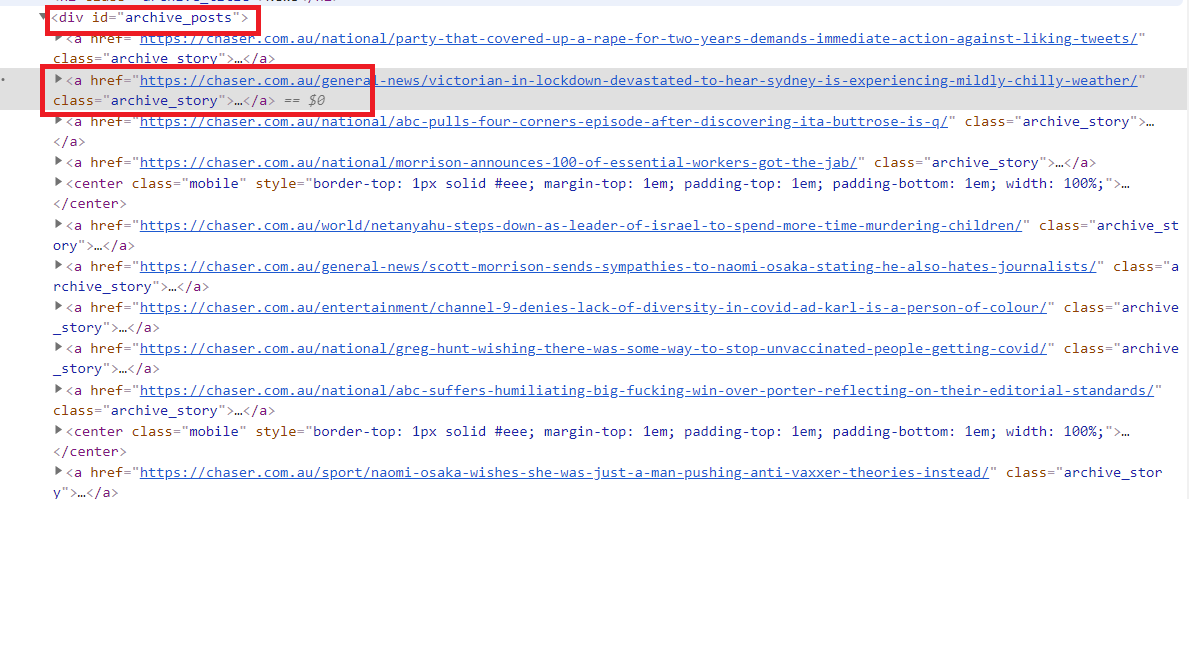

Lấy các thẻ 'a' với id='archive_story' nằm trong thẻ div có id ='archive_posts'


In [38]:
def get_tag(url):
  return parser_website(url).find('div',id='archive_posts').find_all('a',class_='archive_story')

### **Hàm kiểm tra năm**
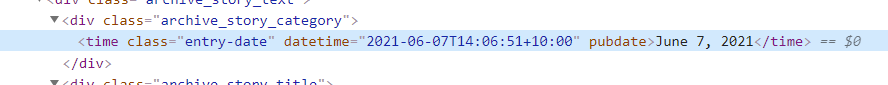


In [39]:
def check_year(year,tag):
  t=tag.find('time',class_='entry-date')['datetime'][:11]
  t=int(t[:4])
  if t<year-2:    # lấy giá trị datetime trong thẻ time và có class='entry-data'. sau đó lấy 4 kí tự đầu và chuyển về kiểu int thì được năm đăng bài viết
    return False
  return True

### **Hàm trích xuất các dữ liệu cần thiết**

In [40]:
def extract_data(hl,link,kind,url,year):
  tag=get_tag(url)
  for i in tag:
    if check_year(year,i)==False:  # bài viết vượt quá 3 năm thì dừng
      return False
    link.append(i['href']) # lấy url thêm vào mảng
    hl.append(i.find('div',class_='archive_story_title').get_text()) # lọc tiêu đề
    kind.append(1) # gán nhãn
  return True
    

### **Hàm ghi file**

In [41]:
import pandas as pd
def Write_file(hl,link,kind,fileName):
  data=pd.DataFrame(columns=['headline','article_link','is_sarcastic'])
  data['headline']=hl
  data['article_link']=link
  data['is_sarcastic']=kind
  data.to_csv(fileName,index=False)


### Main

In [42]:
# scrape the website
n=0;
while(True):
  url='https://chaser.com.au/news/page/{}/'.format(str(n))
  n=n+1
  if extract_data(headline,article_link,is_sarcastic,url,2021)==False:
    break
 

In [43]:
len(headline)  # check số headline đc scrape

1443

In [44]:
Write_file(headline,article_link,is_sarcastic,'chaser.com.au.csv')